# Road Segmentation

The model is trained for the task of segmentation on satellite imagery

(812, 951, 3)


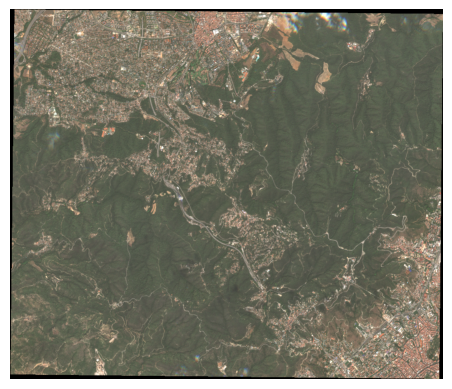

In [42]:

from PIL import Image
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
from skimage.io import imsave

# img_path = 'samples/deep_globe.jpg' # RGB
# img_path = 'samples/deep_globe.png' # RGBA
# img_path = 'samples/sentinel-2-l2a_2024-08-24.tif' 
img_path = "samples/T31TDF_20240824T104021_RGB_10m.jp2 (1).tiff"

def tif2rgb(tif_path):
	# x = rio.open(tif_path).read((4,3,2)) # read RGB bands
	x = rio.open(tif_path).read((1,2,3)) # read RGB bands
	x = np.clip(x / 4000, 0, 1) # normalize to 0-1 with increased brightness
	x = (x * 255).astype(np.uint8) # convert to uint8
	x = x.transpose(1,2,0) # convert to HWC
	# x = resize(x, (256,256))
	# x = (x * 255).astype(np.uint8) # convert to uint8
	# crop
	# x = x[-512:,-512:,:]
	print(x.shape)
	new_path = tif_path.replace('.tif', '.png')
	imsave(new_path, x)
	return new_path

img_path = tif2rgb(img_path)

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
import requests
from IPython.display import JSON
import json

url = f'http://localhost:8000/RoadSegmentationQ2'
# url  = f'https://eotdl.dev.gda.adamplatform.eu/RoadSegmentationQ2'

res = requests.get(url)

with open('metadata.json', 'w') as f:
    json.dump(json.loads(res.json()), f, indent=2)

!cat metadata.json

{
  "type": "FeatureCollection",
  "features": [
    {
      "id": "0",
      "type": "Feature",
      "properties": {
        "type": "Catalog",
        "id": "RoadSegmentationQ2",
        "stac_version": "1.0.0",
        "description": "Catalog for the Road Segmentation Q2 ML Model",
        "links": [
          {
            "rel": "self",
            "href": "/tmp/RoadSegmentationQ2/v1/RoadSegmentationQ2/catalog.json",
            "type": "application/json"
          },
          {
            "rel": "root",
            "href": "./catalog.json",
            "type": "application/json"
          },
          {
            "rel": "child",
            "href": "./model/collection.json",
            "type": "application/json"
          }
        ],
        "extent": null,
        "license": null,
        "properties": null,
        "assets": null,
        "bbox": null,
        "stac_extensions": null,
        "collection": null
      },
      "geometry": null
    },
    {
      "id": "1"

In [44]:
res = requests.post(url,  files={'image': (open(img_path, 'rb'))})

if res.status_code != 200:
   print(res.json())

In [45]:
import numpy as np 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

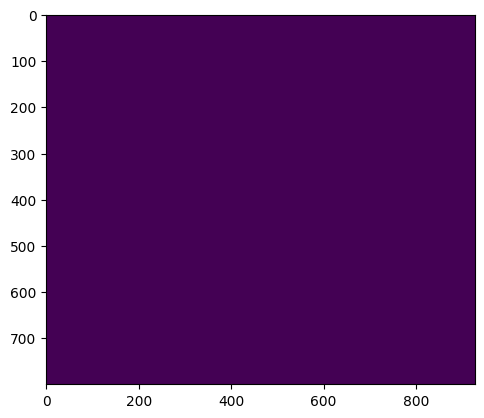

In [46]:
import numpy as np
import io 
from PIL import Image
import numpy as np 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Assuming `response` is an image
res = requests.post(url,  files={'image': (open(img_path, 'rb'))})

image_bytes = io.BytesIO(res.content)
img = Image.open(image_bytes)

logits = np.array(img) 
probas = sigmoid(logits)
mask = probas > 0.5 # use different thresholds for sensitivity analysis
# mask = img

# plt.imshow(array)
plt.imshow(mask)

# mask.shape, mask.dtype, mask.min(), mask.max()

In [47]:
logits.min(), logits.max()

(np.float32(-13.7644415), np.float32(-1.4601254))

In [24]:
probas.min(), probas.max()

NameError: name 'probas' is not defined